## Setup

In [418]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Optional

import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from scipy.ndimage import gaussian_filter1d
from tqdm.notebook import tqdm, trange

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

%matplotlib inline

## Load the trained latent parameters 
The files are in the 'feature' directory.

In [420]:
latent  = torch.load('session19-shuffle.pt', map_location='cpu') 
h1_19 = latent[0] # latent[0] will contain the latent parameters for the first hidden layer. 
h2_19 = latent[1] # latent[1] will contain the latent parameters for the first hidden layer. 
h1_19 = h1_19.detach().numpy()
h2_19 = h2_19.detach().numpy()
h1_19.shape #it is trial x feature x time dimension

(235, 32, 16)

## CCA for each latent spaces

In [413]:
cca = CCA(n_components=3)
cca.fit(h1_19.mean(-1), h2_19.mean(-1))

CCA(copy=True, max_iter=500, n_components=3, scale=True, tol=1e-06)

In [414]:
h1_points = cca.transform(h1_19.mean(0).T)
h2_points = cca.transform(h2_19.mean(0).T)

In [415]:
h1_points = gaussian_filter1d(h1_points, axis=0, sigma=1)
h2_points = gaussian_filter1d(h2_points, axis=0, sigma=1)

In [416]:
xmin, ymin, zmin = np.minimum(np.min(h1_points, axis=0), np.min(h2_points, axis=0)) - 0.09
xmax, ymax, zmax = np.maximum(np.max(h1_points, axis=0), np.max(h2_points, axis=0)) + 0.09

In [327]:
for i, angle in enumerate(trange(0, 360)):
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(111, projection='3d')

    ax.view_init(30, angle)
    
    # if you uncomment these two rows, bunch of images will show up in the notebook
#     plt.draw()
#     plt.pause(0.5)

    ax.plot(h1_points[:, 0], h1_points[:, 1], h1_points[:, 2])
    ax.plot(h2_points[:, 0], h2_points[:, 1], h2_points[:, 2])
    ax.scatter(h1_points[:, 0], h1_points[:, 1], h1_points[:, 2])
    ax.scatter(h2_points[:, 0], h2_points[:, 1], h2_points[:, 2])
    ax.scatter(h1_points[0, 0], h1_points[0, 1], h1_points[0, 2], s=150, marker='o', color='C0')
    ax.scatter(h2_points[0, 0], h2_points[0, 1], h2_points[0, 2], s=150, marker='o', color='C1')
    ax.scatter(h1_points[-1, 0], h1_points[-1, 1], h1_points[-1, 2], marker='X', s=150, color='C0')
    ax.scatter(h2_points[-1, 0], h2_points[-1, 1], h2_points[-1, 2], marker='X', s=150, color='C1')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    ax.set_title('Shuffled LGd > VISp > VISa')
    ax.legend(['LGd to VISp', 'VISp to VISa'])
    
    plt.savefig(f"frame-{i:03d}.png")
    plt.close()

## Export the 3D plots in a video format 

In [328]:
!ffmpeg -r 30 -y -i frame-%03d.png -pix_fmt yuv420p video.mp4

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple LLVM version 10.0.0 (clang-1000.11.45.5)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.3.1 --enable-shared --enable-pthreads --enable-version3 --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librtmp --enable-libspeex --enable-libsoxr --enable-videotoolbox --disable-libjack --disable-indev=jack
  libavutil      56. 51.100 / 56

In [221]:
from IPython.display import Video
Video("video.mp4")

## Plot without making a video 

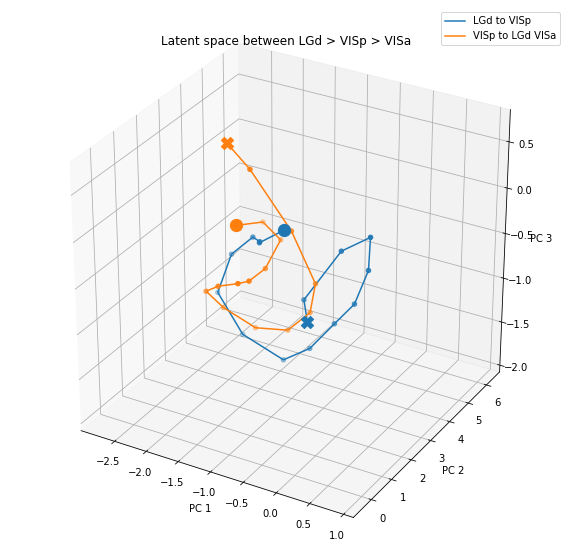

In [166]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
ax.plot(h1_points[:, 0], h1_points[:, 1], h1_points[:, 2])
ax.plot(h2_points[:, 0], h2_points[:, 1], h2_points[:, 2])
ax.scatter(h1_points[:, 0], h1_points[:, 1], h1_points[:, 2])
ax.scatter(h2_points[:, 0], h2_points[:, 1], h2_points[:, 2])
ax.scatter(h1_points[0, 0], h1_points[0, 1], h1_points[0, 2], s=150, marker='o', color='C0')
ax.scatter(h2_points[0, 0], h2_points[0, 1], h2_points[0, 2], s=150, marker='o', color='C1')
ax.scatter(h1_points[-1, 0], h1_points[-1, 1], h1_points[-1, 2], marker='X', s=150, color='C0')
ax.scatter(h2_points[-1, 0], h2_points[-1, 1], h2_points[-1, 2], marker='X', s=150, color='C1')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Latent space between LGd > VISp > VISa')
ax.legend(['LGd to VISp', 'VISp to LGd VISa'])